# Proyecto Multi Uni Variable

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression

In [3]:
data = np.load("training_data.npy")

In [4]:
data[0:, 0] /= 1000
data[0:, 2] /= 1000
data

array([[2.08500e+02, 7.00000e+00, 8.56000e-01, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+02, 6.00000e+00, 1.26200e+00, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+02, 7.00000e+00, 9.20000e-01, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+02, 7.00000e+00, 1.18800e+00, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+02, 5.00000e+00, 1.07800e+00, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+02, 5.00000e+00, 1.25600e+00, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [5]:
data.shape

(1460, 6)

In [6]:
test_data = data[4:1460:5]

In [7]:
test_data.shape

(292, 6)

In [8]:
training_data1 = data[0:1460:5]
training_data2 = data[1:1460:5]
training_data3 = data[2:1460:5]
training_data4 = data[3:1460:5]
training_data = np.vstack((training_data1, training_data2, training_data3, training_data4))

In [9]:
training_data.shape

(1168, 6)

In [10]:
variables = ['SalePrice', 'OverallQual', 'FFSF', 'TotalRooms', 'YearBuilt', 'LotFrontage']
pandas_data = pd.DataFrame(training_data, columns = variables)

In [11]:
pandas_data

,SalePrice,OverallQual,FFSF,TotalRooms,YearBuilt,LotFrontage
0,208.500,7.0,0.856,8.0,2003.0,65.0
1,143.000,5.0,0.796,5.0,1993.0,85.0
2,129.500,5.0,1.040,5.0,1965.0,70.0
3,132.000,7.0,0.854,5.0,1929.0,51.0
4,325.300,8.0,1.158,9.0,2005.0,101.0
...,...,...,...,...,...,...
1163,149.700,6.0,1.236,6.0,1957.0,90.0
1164,121.000,6.0,0.952,4.0,1916.0,NaN
1165,112.000,4.0,0.796,6.0,1910.0,70.0
1166,84.500,5.0,1.140,6.0,2006.0,90.0


## Analisis exploratorio de los datos

In [12]:
data_description = pandas_data.describe()
data_description = data_description.drop(["count","25%","50%","75%"])
data_description = data_description.append(pd.Series(data_description.max() - data_description.min(), name="range"))

data_description

,SalePrice,OverallQual,FFSF,TotalRooms,YearBuilt,LotFrontage
mean,181.637759,6.108733,1.166860,6.522260,1971.403253,70.863257
std,80.292967,1.399348,0.386691,1.640694,30.515860,23.562165
min,34.900000,1.000000,0.334000,2.000000,1875.000000,21.000000
max,755.000000,10.000000,4.692000,14.000000,2010.000000,313.000000
range,720.100000,9.000000,4.358000,12.359306,1979.484140,292.000000


### Sale Price

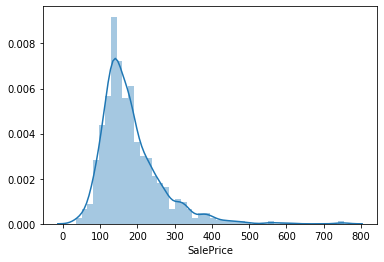

In [13]:
sb.distplot(pandas_data["SalePrice"])

plt.show()

### Overall Quality

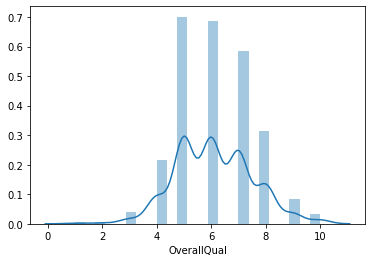

In [14]:
sb.distplot(pandas_data["OverallQual"])

plt.show()

### First Floor Square Feet

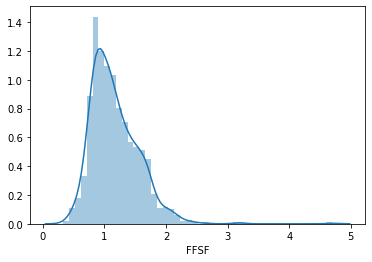

In [15]:
sb.distplot(pandas_data["FFSF"])

plt.show()

### Total Rooms

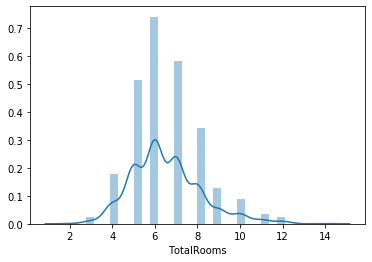

In [16]:
sb.distplot(pandas_data["TotalRooms"])

plt.show()

### Year Built

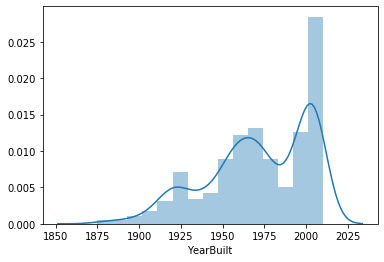

In [17]:
sb.distplot(pandas_data["YearBuilt"])

plt.show()

### Lot Frontage

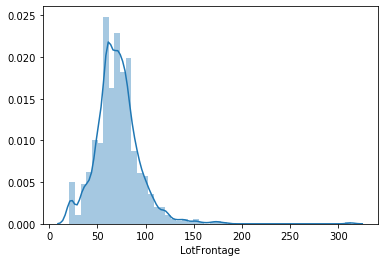

In [18]:
sb.distplot(pandas_data["LotFrontage"].dropna())

plt.show()

## Correlación de variables

### Overall Quality

In [19]:
y = pandas_data["SalePrice"]

corrcoef1 = pandas_data["OverallQual"].corr(y)
corrcoef1

0.7882779309996009

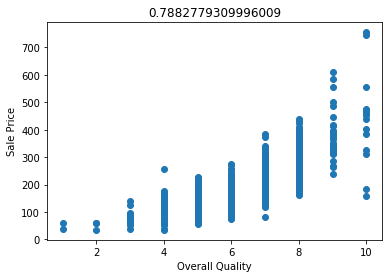

In [20]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)

plt.scatter(pandas_data["OverallQual"], y)

ax1.set_xlabel('Overall Quality')
ax1.set_ylabel('Sale Price')
ax1.set_title(corrcoef1)

plt.show()

### First Floor Square Feet

In [21]:
corrcoef2 = pandas_data["FFSF"].corr(y)
corrcoef2

0.6018461865394861

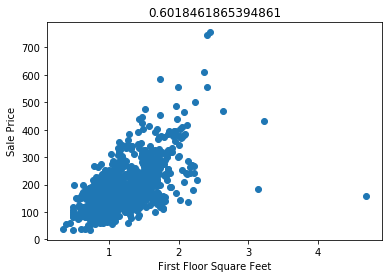

In [22]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)

plt.scatter(pandas_data["FFSF"], y)

ax2.set_xlabel('First Floor Square Feet')
ax2.set_ylabel('Sale Price')
ax2.set_title(corrcoef2)

plt.show()

### Total Rooms

In [23]:
corrcoef3 = pandas_data["TotalRooms"].corr(y)
corrcoef3

0.5204606207809772

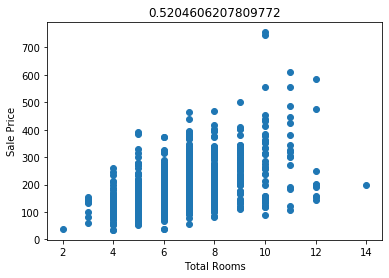

In [24]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1,1,1)

plt.scatter(pandas_data["TotalRooms"], y)

ax3.set_xlabel('Total Rooms')
ax3.set_ylabel('Sale Price')
ax3.set_title(corrcoef3)

plt.show()

### Year Built

In [25]:
corrcoef4 = pandas_data["YearBuilt"].corr(y)
corrcoef4

0.5236685100451868

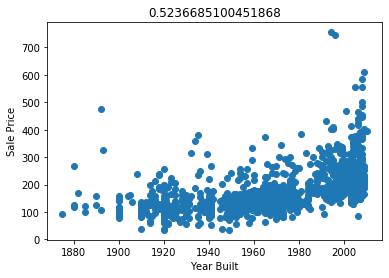

In [26]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(1,1,1)

plt.scatter(pandas_data["YearBuilt"], y)

ax4.set_xlabel('Year Built')
ax4.set_ylabel('Sale Price')
ax4.set_title(corrcoef4)

plt.show()

### Lot Frontage

In [27]:
corrcoef5 = pandas_data["LotFrontage"].corr(y)
corrcoef5

0.359677484543224

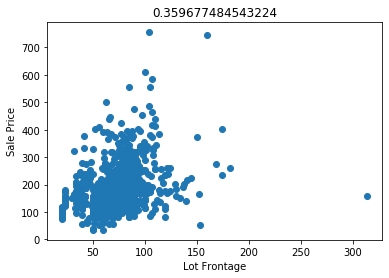

In [28]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(1,1,1)

plt.scatter(pandas_data["LotFrontage"], y)

ax5.set_xlabel('Lot Frontage')
ax5.set_ylabel('Sale Price')
ax5.set_title(corrcoef5)

plt.show()

## Elección de variables

De acuerdo a lo observado las variables con mayor coeficiente de correlación son: 
* OverrallQual - 0.7882779309996005
* FFSF - 0.601846186539486

## Train Model

In [29]:
def train_model(x, y, epochs, print_rate, learning_rate):
    model = np.array([0.0, 0.0])
    gradient = np.array([0.0, 0.0])
    error = np.zeros(epochs)
    model_i = {}
    
    matrix = np.hstack((x, np.ones_like(x)))
    
    for i in range(0, epochs):
        
        y_hat = np.matmul(matrix, model).reshape(-1, 1)
        
        diff = y_hat - y
        
        error[i] = 0.5 * np.average(np.power(diff, 2))
        
        gradient = np.average(diff * matrix, axis = 0)
        
        model -= (learning_rate * gradient)
        
        model_i[i] = model.copy()
        
        if (i % print_rate) == 0:
            print("errors: " + str(error[i]) + " model: " + str(model))
            
    return model_i, error

In [30]:
def loss(error):
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    x_ = np.arange(len(error))

    plt.plot(x_, error)

    ax.set_xlabel('Iteration')
    ax.set_ylabel('Error')

    plt.show()

In [31]:
def progress(x, y, model, n):
    graphs = len(model) // n 

    fig = plt.figure(figsize=(16, 20))
    
    matrix = np.hstack((x, np.ones_like(x)))
    
    for i in range(1, graphs + 1):
        model_to_use = model[(i * n) - 1]
        y_hat = np.matmul(matrix, model_to_use).reshape(-1, 1)
        
        ax = fig.add_subplot(graphs, 1, i)
        
        ax.set_title(model_to_use)

        plt.scatter(x, y)
        plt.plot(x, y_hat)
        
    plt.show()

In [32]:
y_ = training_data[:,0].reshape(-1, 1)
x1 = training_data[:,1].reshape(-1, 1)
x2 = training_data[:,2].reshape(-1, 1)

errors: 19716.858142672947 model: [0.11980699 0.01816378]
errors: 1460.3066180987644 model: [29.90632689  3.67245195]
errors: 1455.6635247944173 model: [30.06393828  2.72193142]
errors: 1451.1116763446084 model: [30.21076477  1.77917066]
errors: 1446.6475320460218 model: [30.35616694  0.84553609]
errors: 1442.2694020315596 model: [30.50016151 -0.07906019]
errors: 1437.9756289943373 model: [30.64276211 -0.99470566]
errors: 1433.7645875601468 model: [30.78398222 -1.90148699]
errors: 1429.6346836721805 model: [30.92383521 -2.79948999]
errors: 1425.584353987614 model: [31.06233431 -3.68879963]


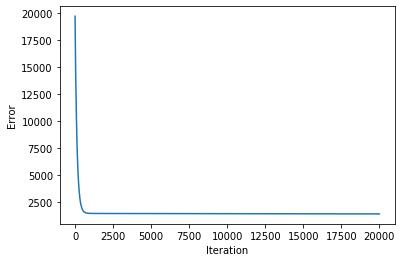

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


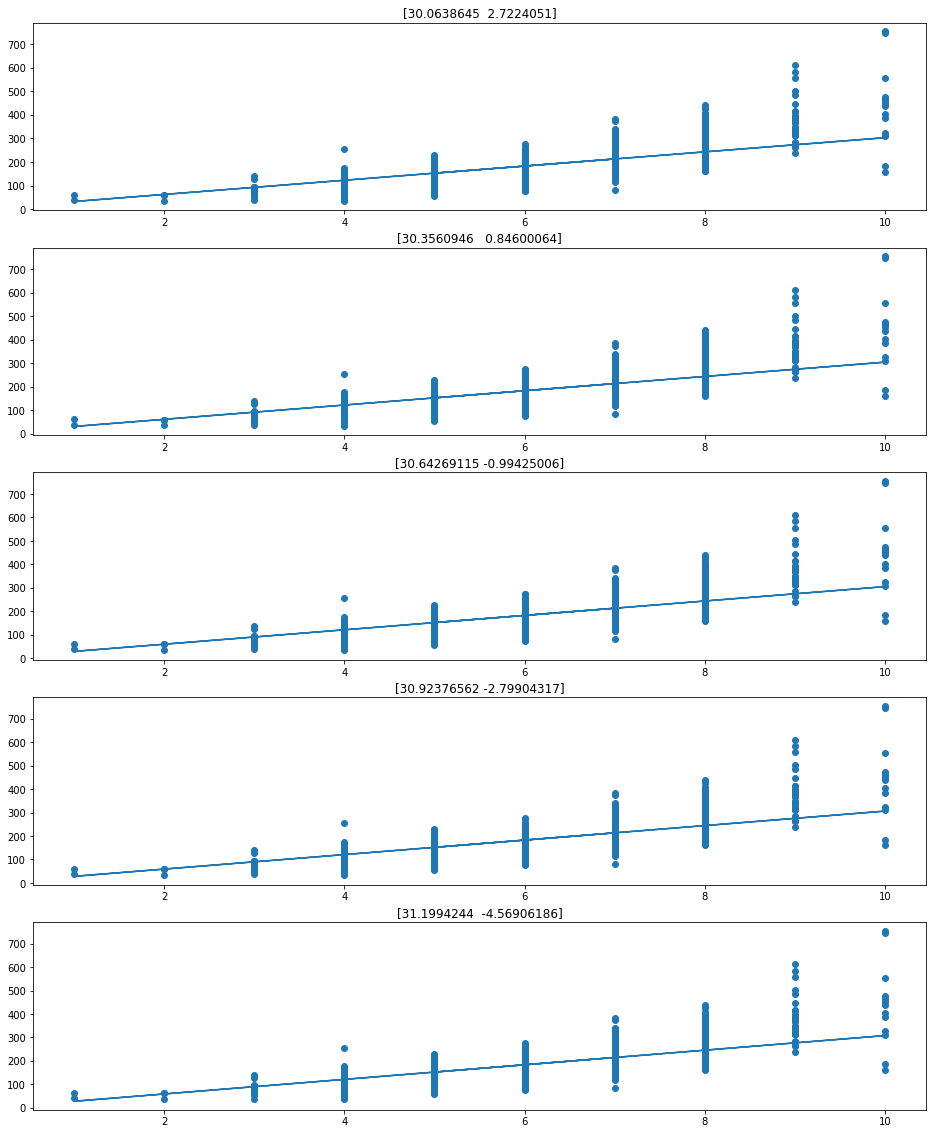

In [33]:
model1, error1 = train_model(x1, y_, 20000, 2000, 0.0001)
loss(error1)
progress(x1, y_, model1, 4000)

errors: 19716.858142672947 model: [0.02306164 0.01816378]
errors: 2473.2372970334163 model: [81.7066893  62.66929613]
errors: 2124.8619662378374 model: [94.43194236 69.97366415]
errors: 2112.1489533945974 model: [97.38785363 69.55605481]
errors: 2106.6323607457302 model: [98.91256827 68.1198497 ]
errors: 2101.74787719129 model: [100.1829553   66.60578269]
errors: 2097.3198249035254 model: [101.36726182  65.14321122]
errors: 2093.303454958317 model: [102.49157474  63.74737823]
errors: 2089.6604510378543 model: [103.56184711  62.41759793]
errors: 2086.3561038136254 model: [104.5810881   61.15107621]


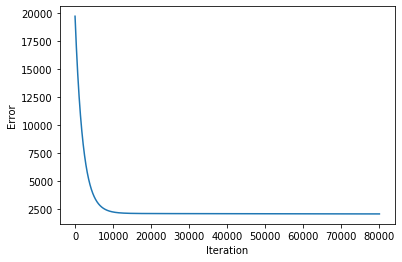

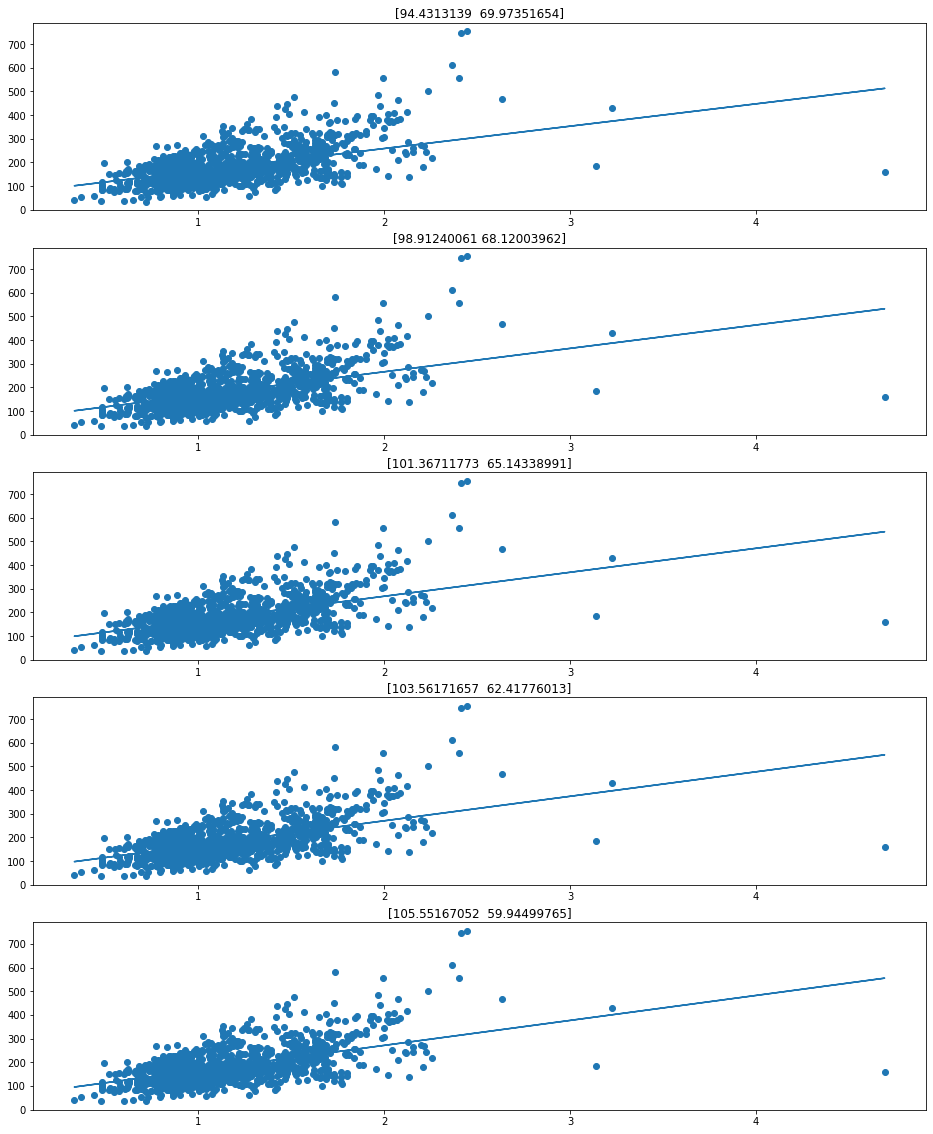

In [34]:
model2, error2 = train_model(x2, y_, 80000, 8000, 0.0001)
loss(error2)
progress(x2, y_, model2, 16000)

## Scikit Learn

In [35]:
y__ = test_data[:,0].reshape(-1, 1)
x1_ = test_data[:,1].reshape(-1, 1)
x2_ = test_data[:,2].reshape(-1, 1)

In [36]:
regression1 = LinearRegression().fit(x1, y_)
regression2 = LinearRegression().fit(x2, y_)

In [37]:
model_sl1 = np.array([regression1.coef_[0, 0], regression1.intercept_[0]])
model_sl2 = np.array([regression2.coef_[0, 0], regression2.intercept_[0]])

In [38]:
model_1 = model1[len(model1) - 1]
model_2 = model2[len(model2) - 1]

In [39]:
def create_new_model(x, model, model_sl):
    matrix = np.hstack((x, np.ones_like(x)))
    
    y_hat = np.matmul(matrix, model)
    y_hat_sl = np.matmul(matrix, model_sl)
    
    y_hat_m = (y_hat + y_hat_sl) / 2
    
    return y_hat, y_hat_sl, y_hat_m

In [40]:
def compare_model(x, y, model, model_sl):
    y_hat, y_hat_sl, y_hat_m = create_new_model(x1, model_1, model_sl1)
    
    error_hat = 0.5 * np.average(np.power(y_hat - y, 2))
    error_hat_sl = 0.5 * np.average(np.power(y_hat_sl - y, 2))
    error_hat_m = 0.5 * np.average(np.power(y_hat_m - y, 2))
    
    return error_hat, error_hat_sl, error_hat_m

In [42]:
e_hat1, e_hat_sl1, e_hat_m1 = compare_model(x1_, y__, model_1, model_sl1)
e_hat2, e_hat_sl2, e_hat_m2 = compare_model(x2_, y__, model_2, model_sl2)

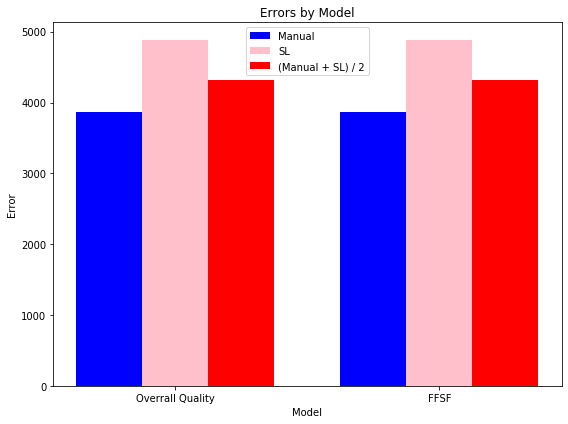

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
j = np.arange(2)
bar_width = 0.25

bar1 = plt.bar(j, (e_hat1, e_hat1), bar_width, color='blue', label='Manual')
bar2 = plt.bar(j + bar_width, (e_hat_sl1, e_hat_sl2), bar_width, color='pink', label='SL')
bar3 = plt.bar(j + 2 * bar_width, (e_hat_m1, e_hat_m2), bar_width, color='red', label='(Manual + SL) / 2')

plt.xlabel('Model')
plt.ylabel('Error')
plt.title('Errors by Model')
plt.xticks(j + bar_width, ('Overrall Quality', 'FFSF'))
plt.legend()

plt.tight_layout()
plt.show()

En conclusión, el mejor modelo para ambas variables, Overrall Quality y First Floor Square Feet es el generado por Manualmente